<a href="https://colab.research.google.com/github/MeganVW06/project_gss/blob/main/GSS__Exploratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Does religion correlate with people's opinions on capital punishment?##

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [14]:
df = pd.read_csv('selected_gss_data.csv',low_memory=False)

In [5]:
print(df.shape)
print(df.dtypes)
df.head()

(72392, 2)
relig     object
cappun    object
dtype: object


,relig,cappun
0,jewish,NaN
1,catholic,NaN
2,protestant,NaN
3,other,NaN
4,protestant,NaN


In [16]:
relig = df['relig']
relig.unique()

array(['jewish', 'catholic', 'protestant', 'other', 'none', nan, 'relig',
       'inter-nondenominational', 'christian', 'muslim/islam', 'buddhism',
       'orthodox-christian', 'native american', 'hinduism',
       'other eastern religions'], dtype=object)

In [7]:
cappun = df['cappun']
cappun.unique()

array([nan, 'favor', 'oppose', 'cappun'], dtype=object)

In [18]:
#cleaning data - combining religion variables
difrelig = df['relig'] # Create a temporary vector of values for the relig variable to play with

difrelig = difrelig.replace(['catholic', 'protestant','inter-nondenominational','christian', 'orthodox-christian'],'christian') # All christian values

difrelig = difrelig.replace(['other', 'relig', 'other eastern religions'], 'Other Religions')

df['relig'] = difrelig # Replace the 'difrelif' variable with the cleaned version
df['relig'].value_counts()

christian          58702
none                9895
jewish              1421
Other Religions     1270
buddhism             272
muslim/islam         201
hinduism             158
native american       36
Name: relig, dtype: int64

It can be seen that the Chrisianity category has comined all of the denomination. It can also be see that the "Other Religion" Cateogry now contains all ambiguous religion values.

In [19]:
df['relig'].isna().sum() #count the nans in the religion column

437

There are 437 NaN values in the religion category. This is less than 1% of the observations, so we can drop these values.

In [21]:
df = df.dropna(subset=["relig"])
df['relig'].isna().sum() # now we can see that there are no NaN values for religion

0

It looks like there's quite a few NaNs as well as some values "cappun". "cappun" as an entry doesn't make sense and since there is only 2 we will drop the rows with that entry.

In [ ]:
df = df.drop(df[df['cappun'] == 'cappun'].index)

In [24]:
print(pd.crosstab(df['cappun'],df['relig']),'\n')

relig   Other Religions  buddhism  christian  hinduism  jewish  muslim/islam  \
cappun                                                                         
cappun                2         0          0         0       0             0   
favor               688       121      34977        73     772            93   
oppose              379       107      14193        63     384            81   

relig   native american  none  
cappun                         
cappun                0     0  
favor                16  5228  
oppose               15  3329   



It looks like buddhists, hinduists, inter-nondenominational, muslim, and native americans slightly favor the death penalty. Catholics, christians, jewish people, non-religious people, orthodox christians, protestant, and other strongly favor the death penalty. No group opposes it more than they favor it.

##Visualizations##

<ipython-input-22-bdd0492dfeb5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'jewish'),
 Text(1, 0, 'christian'),
 Text(2, 0, 'Other Religions'),
 Text(3, 0, 'none'),
 Text(4, 0, 'muslim/islam'),
 Text(5, 0, 'buddhism'),
 Text(6, 0, 'native american'),
 Text(7, 0, 'hinduism')]

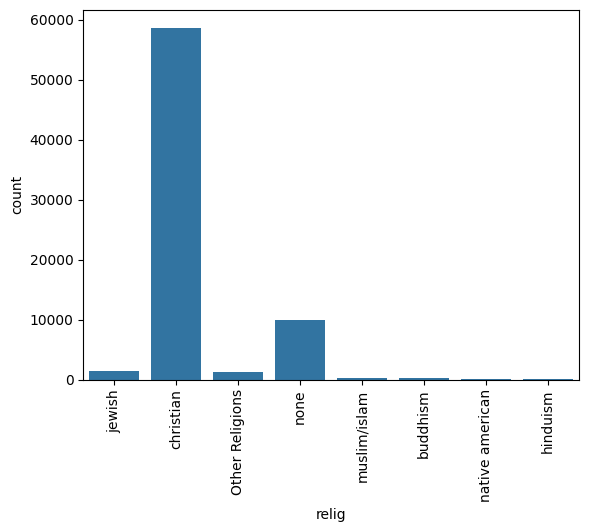

In [22]:
my_plot = sns.countplot(df, x="relig")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

We can see that a large portion of the people surveyed were protestant, with the second largets group being catholic, and the third largest group being no religion.

<ipython-input-23-3c51b6b2605f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'jewish'),
 Text(1, 0, 'christian'),
 Text(2, 0, 'Other Religions'),
 Text(3, 0, 'none'),
 Text(4, 0, 'muslim/islam'),
 Text(5, 0, 'buddhism'),
 Text(6, 0, 'native american'),
 Text(7, 0, 'hinduism')]

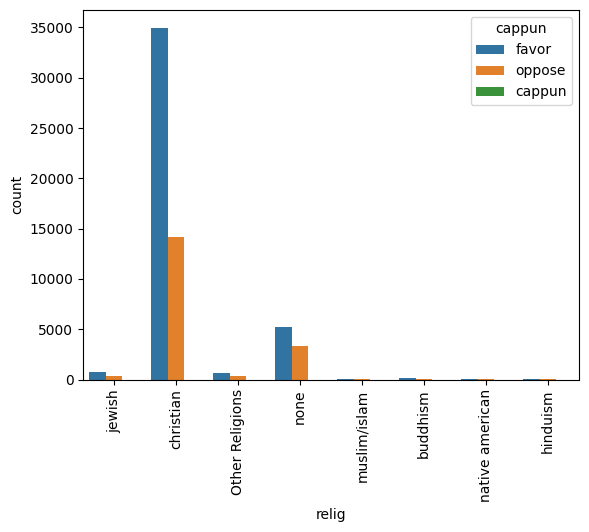

In [23]:
my_plot = sns.countplot(df, x="relig", hue="cappun")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)